# Kalman Filters

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

from datetime import datetime
import itertools

import pandas as pd
import pandas_datareader.data as web
from pykalman import KalmanFilter
# import pywt

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
idx = pd.IndexSlice

# Get Data

In [5]:
DATA_STORE = '../data/assets.h5'

In [81]:
with pd.HDFStore(DATA_STORE) as store:
    snp500 = store['sp500/fred'].loc['2012':'2020', 'close']

In [82]:
snp500.dropna(inplace=True)

# Kalman Filter Configuration

In [83]:
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=0,
                  initial_state_covariance=1,
                  observation_covariance=1,
                  transition_covariance=.01)

In [84]:
state_means, _ = kf.filter(snp500)

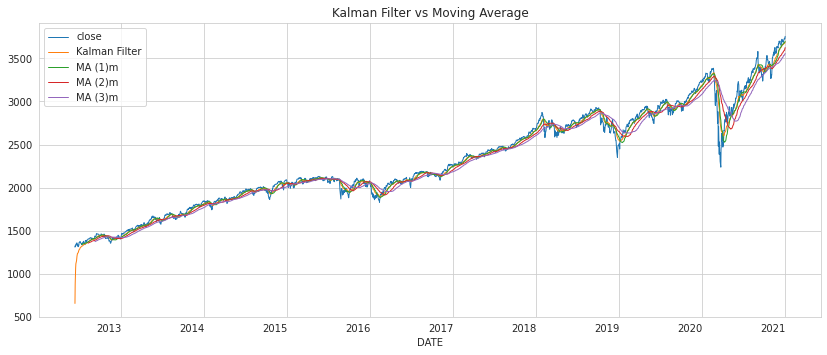

In [85]:
sp500_smoothed = snp500.to_frame('close')
sp500_smoothed['Kalman Filter'] = state_means

for months in [1, 2, 3]:
    sp500_smoothed[f'MA ({months})m'] = (snp500.rolling(window=months * 21)
                                         .mean())
    
ax = sp500_smoothed.plot(title='Kalman Filter vs Moving Average',
                         figsize=(14, 6), lw=1, rot=0)